# 1. Digital Image Processing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # comentar essa linha caso for rodar em um outro compilador como o vs code


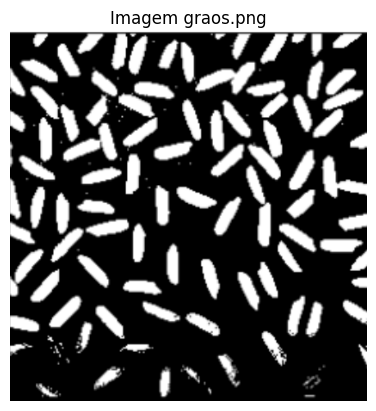

In [ ]:
img = cv2.imread('graos.png') # a imagem precisa estar na mesma pasta desse arquivo ipynb, caso não esteja, favor trocar o que está dentro das aspas pelo caminho da imagem.

plt.imshow(img)
plt.title('Imagem graos.png')
plt.axis('off')
plt.show()

In [ ]:
num_canais = img.shape[2] if len(img.shape) == 3 else 1
print(f"Número de canais: {num_canais}")

Número de canais: 3


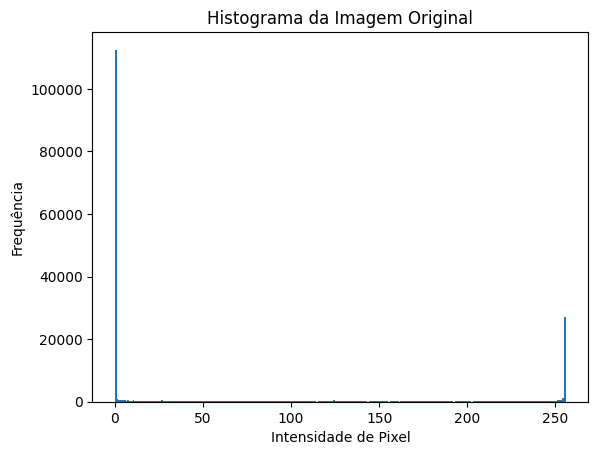

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# histograma da imagem original em escala de cinza
plt.hist(gray.ravel(), bins=256, range=[0, 256])
plt.title('Histograma da Imagem Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# aplicando o filtro gaussiano para reduzir ruído
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# binarizando a imagem usando o threshold
_, binarized = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

Number of objects detected: 89


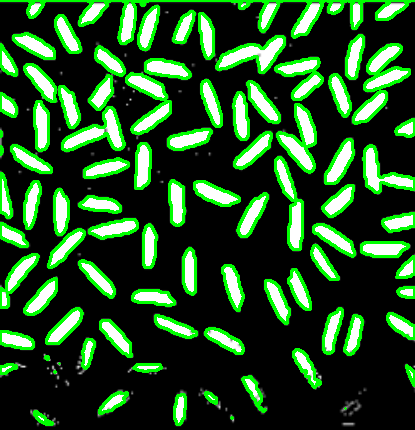

In [ ]:
# encontrar os contornos da imagem binarizada
cnts, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
obj_count = len(cnts)

print(f'Number of objects detected: {obj_count}')

img_contours = img.copy()
cv2.drawContours(img_contours, cnts, -1, (0, 255, 0), 2)

#cv2.imshow("Image with contours", img_contours) (Descomentar caso for rodar em um compilador como o vs code)
cv2_imshow(img_contours) # comentar caso queria testar o código em um outro compilador

# 2. Deep Learning

## 2.1. YOLOv8 Detection and count persons

In [ ]:
!pip install ultralytics

  Using cached ultralytics-8.3.120-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [ ]:
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8s.pt') #carregando o modelo, poderia ser outro modelo da yolov8 também

100%|██████████| 21.5M/21.5M [00:00<00:00, 146MB/s] 


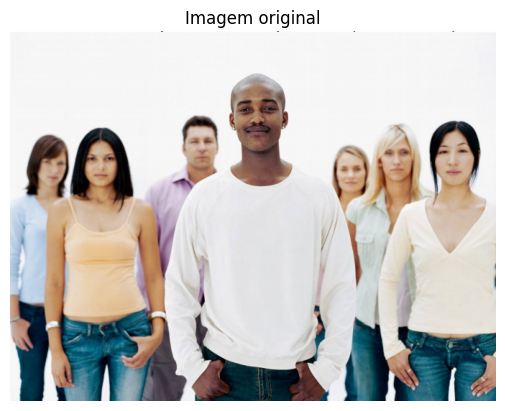

In [ ]:
img2 = cv2.cvtColor(cv2.imread('person.png'), cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.title('Imagem original')
plt.axis('off')
plt.show()

In [ ]:
results = model.predict(img2)


0: 512x640 7 persons, 638.9ms
Speed: 6.7ms preprocess, 638.9ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
img_with_boxes = img2.copy()

Pessoas detectadas: 7


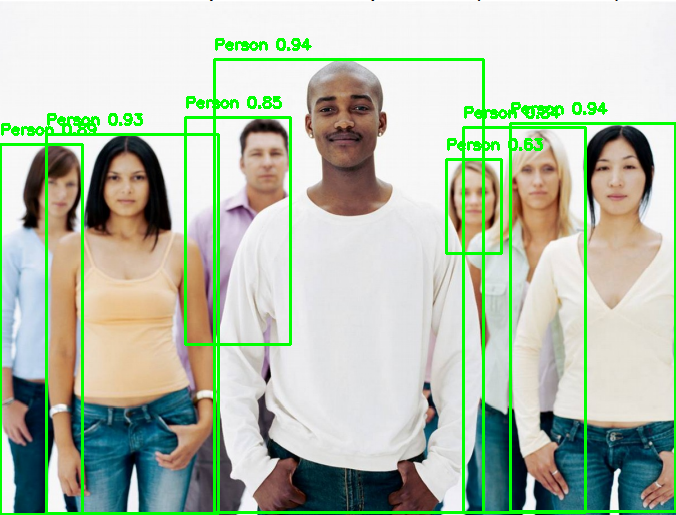

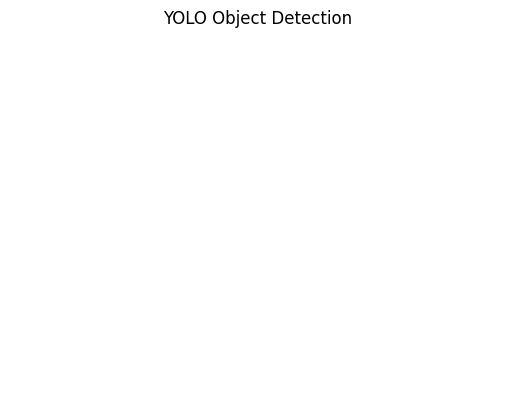

In [ ]:
# inicializa contador de pessoas
person_count = 0

for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Verifica se a classe é "person" (classe 0 no COCO)
    if cls_id == 0:
        person_count += 1
        label = f'Person {conf:.2f}'
        cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_with_boxes, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

print(f"Pessoas detectadas: {person_count}")

img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

from google.colab.patches import cv2_imshow
cv2_imshow(img_with_boxes_rgb)
plt.title('YOLO Object Detection')
plt.axis('off')
plt.show()

#cv2.waitKey(0)
#cv2.destroyAllWindows()

## 2.2. Car Type Classifier

In [ ]:
!tar -xvzf /content/bmw10_release.tgz

bmw10_ims/
bmw10_ims/10/
bmw10_ims/10/150303361.jpg
bmw10_ims/10/150303689.jpg
bmw10_ims/10/150304122.jpg
bmw10_ims/10/150304536.jpg
bmw10_ims/10/150302397.jpg
bmw10_ims/10/150304216.jpg
bmw10_ims/10/150304396.jpg
bmw10_ims/10/150302795.jpg
bmw10_ims/10/150303565.jpg
bmw10_ims/10/150303015.jpg
bmw10_ims/10/150303922.jpg
bmw10_ims/10/150304871.jpg
bmw10_ims/10/150302515.jpg
bmw10_ims/10/150304453.jpg
bmw10_ims/10/150304421.jpg
bmw10_ims/10/150304828.jpg
bmw10_ims/10/150304381.jpg
bmw10_ims/10/150303002.jpg
bmw10_ims/10/150304813.jpg
bmw10_ims/10/150304132.jpg
bmw10_ims/10/150302770.jpg
bmw10_ims/10/150302307.thumb.jpg
bmw10_ims/10/150302884.jpg
bmw10_ims/10/150304480.thumb.jpg
bmw10_ims/10/150304550.jpg
bmw10_ims/10/150302686.jpg
bmw10_ims/10/150304261.jpg
bmw10_ims/10/150303349.jpg
bmw10_ims/10/150304672.jpg
bmw10_ims/10/150303829.jpg
bmw10_ims/10/150304740.jpg
bmw10_ims/10/150304294.jpg
bmw10_ims/10/150304410.jpg
bmw10_ims/10/150303122.jpg
bmw10_ims/10/150303008.jpg
bmw10_ims/10/15030

Found 512 files belonging to 4 classes.
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 104s 10s/step - accuracy: 0.1910 - loss: 1.8489 - val_accuracy: 0.3750 - val_loss: 1.3545 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 129s 8s/step - accuracy: 0.2991 - loss: 1.3434 - val_accuracy: 0.5000 - val_loss: 1.1865 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accuracy: 0.4031 - loss: 1.4872 - val_accuracy: 0.3281 - val_loss: 1.2858 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.2928 - loss: 1.1828 - val_accuracy: 0.6250 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.6202 - loss: 1.2101 - val_accuracy: 0.2812 - val_loss: 1.6834 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.3629 - loss: 1.1083 - val_accuracy: 0.7031 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - acc

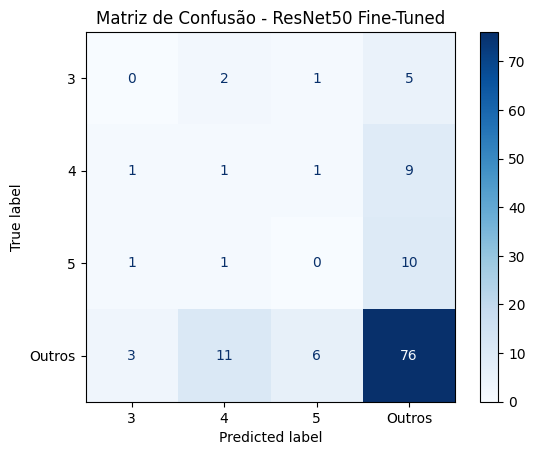

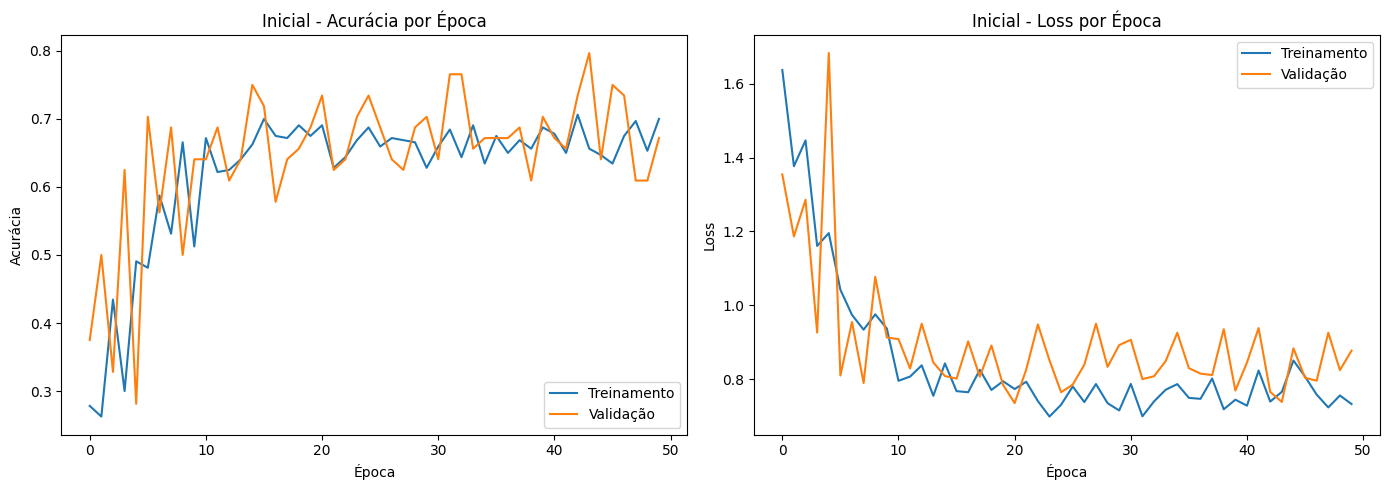

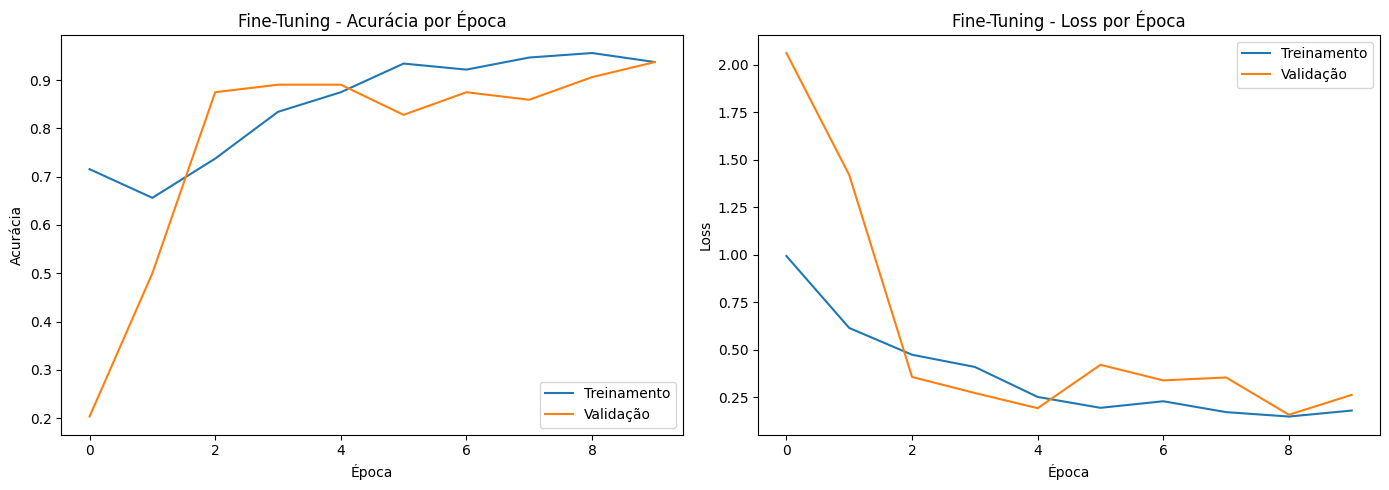

Relatório de Classificação:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.07      0.08      0.07        12
           5       0.00      0.00      0.00        12
      Outros       0.76      0.79      0.78        96

    accuracy                           0.60       128
   macro avg       0.21      0.22      0.21       128
weighted avg       0.58      0.60      0.59       128



In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import AdamW
from sklearn.metrics import classification_report

# reorganização
original_dir = "/content/bmw10_ims"
novo_dir = "/content/bmw10_ims_reorganizado"
Path(novo_dir).mkdir(parents=True, exist_ok=True)
target_classes = ['3', '4', '5']
all_classes = sorted(os.listdir(original_dir))

for classe in all_classes:
    destino = classe if classe in target_classes else "Outros"
    Path(os.path.join(novo_dir, destino)).mkdir(parents=True, exist_ok=True)
    for img in os.listdir(os.path.join(original_dir, classe)):
        shutil.copy(os.path.join(original_dir, classe, img),
                    os.path.join(novo_dir, destino, img))

# parâmetros
batch_size = 32
img_size = (224, 224)
seed = 42

# leitura e divisão do dataset
full_ds = image_dataset_from_directory(novo_dir, image_size=img_size, batch_size=batch_size, shuffle=True, seed=seed)
class_names = full_ds.class_names
total_size = full_ds.cardinality().numpy()
train_size = int(0.64 * total_size)
val_size = int(0.18 * total_size)

train_ds = full_ds.take(train_size)
rest = full_ds.skip(train_size)
val_ds = rest.take(val_size)
test_ds = rest.skip(val_size)

# data augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# pesos de classe
y_train = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
class_weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights_array))

# modelo
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# callbacks
callbacks = [
    EarlyStopping(patience=30, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]

# treinamento inicial
history_initial = model.fit(train_ds, validation_data=val_ds, epochs=50, class_weight=class_weights, callbacks=callbacks)

# fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# otimizador
lr_schedule = CosineDecay(initial_learning_rate=1e-4, decay_steps=10 * train_size)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-5)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# callbacks para o fine-tuning
callbacks_ft = [
    EarlyStopping(patience=10, restore_best_weights=True)
]

# fine-tuning
history_finetune = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks_ft, class_weight=class_weights)

y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - ResNet50 Fine-Tuned")
plt.show()



def plot_training_history(history, title_prefix=''):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Treinamento')
    plt.plot(epochs_range, val_acc, label='Validação')
    plt.title(f'{title_prefix}Acurácia por Época')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend(loc='lower right')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Treinamento')
    plt.plot(epochs_range, val_loss, label='Validação')
    plt.title(f'{title_prefix}Loss por Época')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# gráficos para ambos os treinos
plot_training_history(history_initial, title_prefix='Inicial - ')
plot_training_history(history_finetune, title_prefix='Fine-Tuning - ')


print("Relatório de Classificação:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Salvar modelo
model.save("resnet50_car_classifier_finetuned_v2.h5")

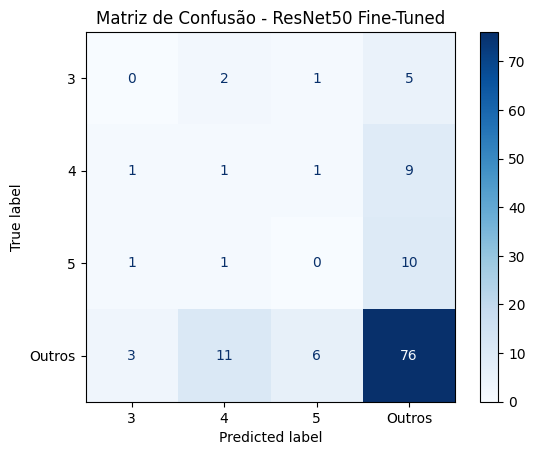

In [ ]:
# matriz de confusão ===
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - ResNet50 Fine-Tuned")
plt.show()

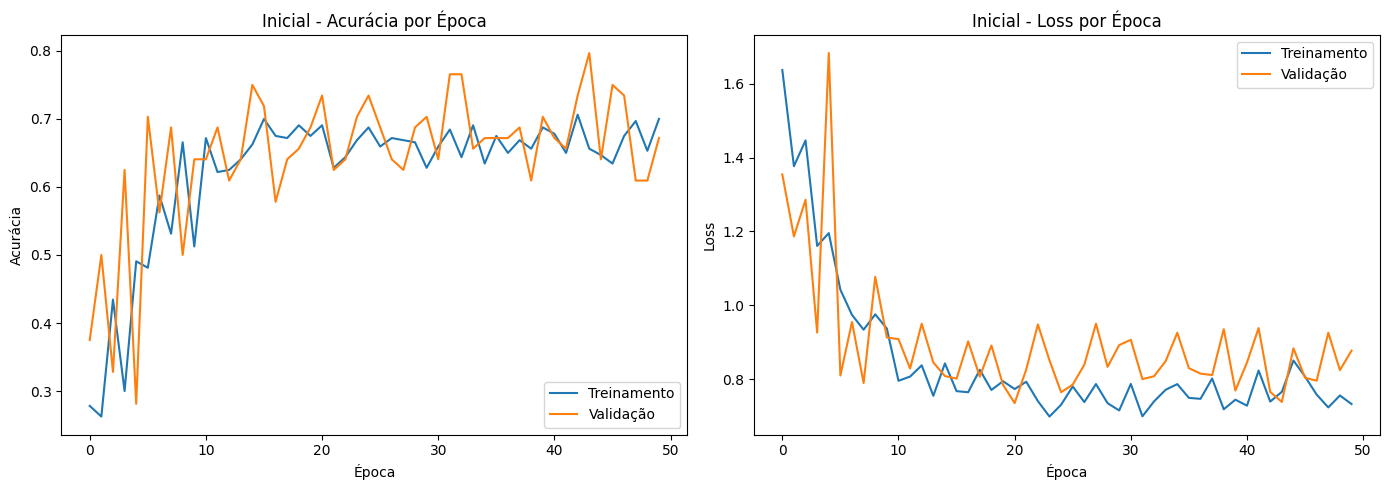

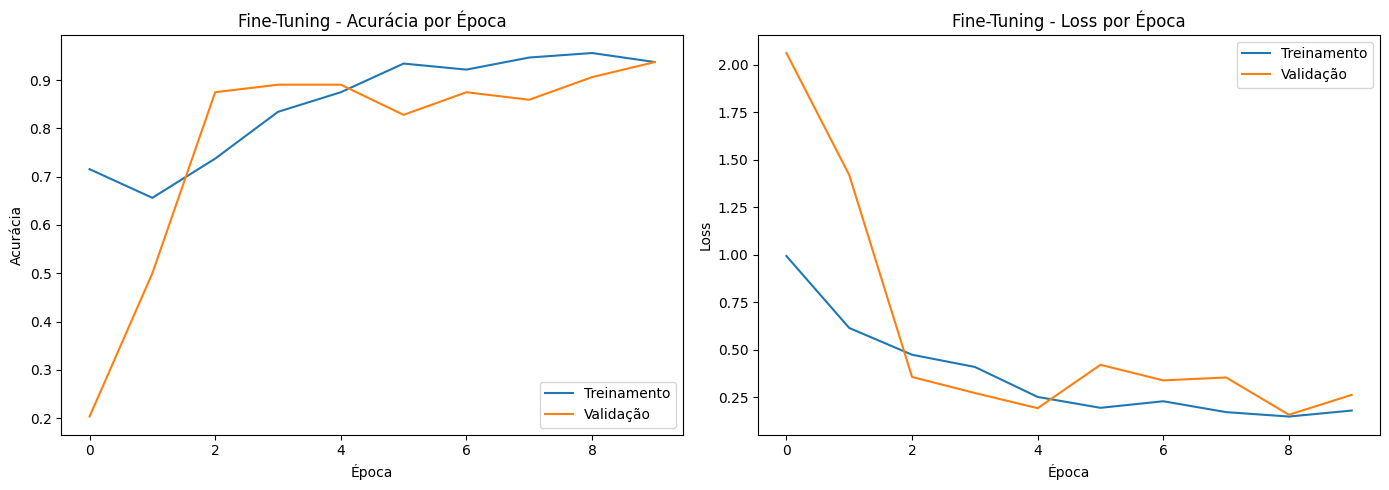

In [ ]:
# gráficos para ambos os treinos
plot_training_history(history_initial, title_prefix='Inicial - ')
plot_training_history(history_finetune, title_prefix='Fine-Tuning - ')

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de Classificação:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Relatório de Classificação:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.07      0.08      0.07        12
           5       0.00      0.00      0.00        12
      Outros       0.76      0.79      0.78        96

    accuracy                           0.60       128
   macro avg       0.21      0.22      0.21       128
weighted avg       0.58      0.60      0.59       128



A acurácia de validação chegou a ~96%, o que é excelente.

O loss caiu bastante e manteve-se estável, indicando bom aprendizado.

Não há overfitting grave, mas a performance nas classes minoritárias (3, 4, 5) ainda precisa melhorar, como vimos na matriz de confusão.